In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import zipfile


# import seaborn as sns
# sns.set()

# #Make sure to pip install monkeylearn first
# from monkeylearn import MonkeyLearn
from textblob import TextBlob
import re

In [2]:
tweets = pd.read_csv('data/TrumpTweetsCleaned.csv')
#09-11-2017 to 02-16-2018
before = pd.to_datetime('2017-09-11')
after = pd.to_datetime('2018-02-16')
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
# new_tweets = tweets[(tweets['created_at']>=before) and (tweets['created_at']<=after)]
tweets.head()







,text,created_at,retweet_count,favorite_count,is_retweet
0,Look at the way Crooked Hillary is handling th...,2016-11-01 10:31:00,21459.0,55584.0,False
1,Wow now leading in @ABC /@washingtonpost Poll ...,2016-11-01 11:55:00,16479.0,39631.0,False
2,Crooked Hillary should not be allowed to run f...,2016-11-01 12:01:00,23747.0,59656.0,False
3,JOIN ME TOMORROW IN FLORIDA!MIAMI‚Ä¢12pmhttps:...,2016-11-01 13:35:00,8773.0,17583.0,False
4,So terrible that Crooked didn't report she got...,2016-11-01 14:14:00,32713.0,80724.0,False


In [3]:
tweets['polarity'] = [TextBlob(tweets['text'].values[i]).polarity for i in range(len(tweets))]
tweets['subjectivity'] = [TextBlob(tweets['text'].values[i]).subjectivity for i in range(len(tweets))]
tweets.head()


,text,created_at,retweet_count,favorite_count,is_retweet,polarity,subjectivity
0,Look at the way Crooked Hillary is handling th...,2016-11-01 10:31:00,21459.0,55584.0,False,-0.2625,0.422917
1,Wow now leading in @ABC /@washingtonpost Poll ...,2016-11-01 11:55:00,16479.0,39631.0,False,0.2000,0.533333
2,Crooked Hillary should not be allowed to run f...,2016-11-01 12:01:00,23747.0,59656.0,False,0.0000,0.100000
3,JOIN ME TOMORROW IN FLORIDA!MIAMI‚Ä¢12pmhttps:...,2016-11-01 13:35:00,8773.0,17583.0,False,0.0000,0.000000
4,So terrible that Crooked didn't report she got...,2016-11-01 14:14:00,32713.0,80724.0,False,-0.5000,0.550000


In [4]:
len(tweets[tweets['polarity']==0])/len(tweets)

0.19706092458414123

In [5]:
processed_features = []

for sentence in range(0, len(tweets['text'].values)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(tweets['text'].values[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
processed_features

['look at the way crooked hillary is handling the mail case and the total mess she is in she is unfit to be president bad judgement ',
 'wow now leading in abc washingtonpost poll 46 to 45 gone up 12 points in two weeks mostly before the crooked hillary blow up ',
 'crooked hillary should not be allowed to run for president she deleted 33000 mails after getting subpoena from s congress rigged ',
 'join me tomorrow in florida miami ä 12pmhttps co a3x71q6sg2orlando ä 4pmhttps co 6bqtvoty5cpensacola ä 7p ä https co knzraeulzo',
 'so terrible that crooked didn report she got the debate questions from donna brazile if that were me it would have been front page news ',
 ' icymi governor mike_pence and were in valley forge pennsylvania today you can watch it here ä https co 6gwgmcv23z',
 ' darrellissa is very good man help him win his congressional seat in california ',
 ' kept me out of jail top doj official involved in clinton probe represented her campaign chairman https co quzn97ceoq',
 '

In [6]:
tweets['test'] = [TextBlob(processed_features[i]).polarity for i in range(len(processed_features))]
len(tweets[tweets['test']==0])/len(tweets)

0.19491784876007756

/Users/kendricknguyen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


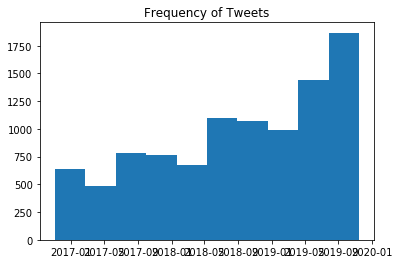

In [7]:
temp = plt.hist(tweets['created_at'])
plt.title('Frequency of Tweets')
plt.show()

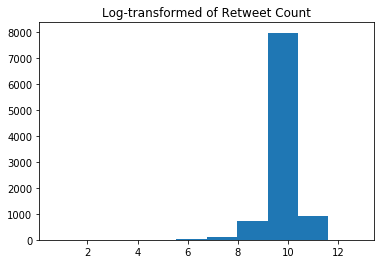

In [8]:
temp2 = plt.hist(np.log(tweets['retweet_count']))
plt.title('Log-transformed of Retweet Count')
plt.show()

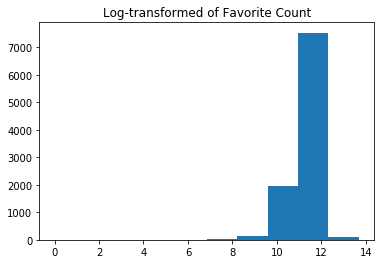

In [9]:
temp3 = plt.hist(np.log(tweets['favorite_count'] + 1))
plt.title('Log-transformed of Favorite Count')
plt.show()

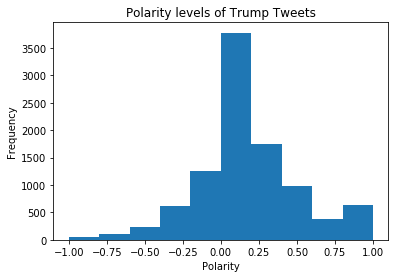

In [11]:
plt.hist(tweets['polarity'])
plt.title('Polarity levels of Trump Tweets')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

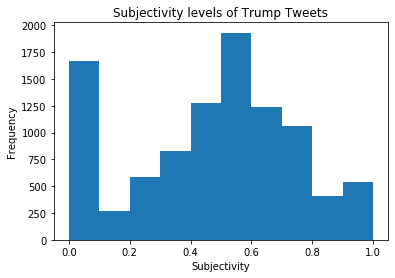

In [12]:
plt.hist(tweets['subjectivity'])
plt.title('Subjectivity levels of Trump Tweets')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

In [18]:
tweets[(tweets['polarity']==0) & (tweets['subjectivity'] == 0)]

,text,created_at,retweet_count,favorite_count,is_retweet,polarity,subjectivity,test
3,JOIN ME TOMORROW IN FLORIDA!MIAMI‚Ä¢12pmhttps:...,2016-11-01 13:35:00,8773.0,17583.0,False,0.0,0.0,0.0
5,#ICYMI: Governor @mike_pence and I were in Val...,2016-11-01 17:24:00,7662.0,20695.0,False,0.0,0.0,0.0
10,Mika Brzezinski: Dem Criticism of Comey Reinfo...,2016-11-01 21:28:00,10619.0,21633.0,False,0.0,0.0,0.0
12,WikiLeaks emails reveal Podesta urging Clinton...,2016-11-01 21:57:00,14276.0,25817.0,False,0.0,0.0,0.0
14,Join me in Florida tomorrow!MIAMI‚Ä¢12pmhttps:...,2016-11-02 03:43:00,8314.0,18853.0,False,0.0,0.0,0.0
23,Clinton camp fumed when surrogate told support...,2016-11-02 18:58:00,9997.0,19222.0,False,0.0,0.0,0.0
25,Thank you Orlando Florida! We are just six day...,2016-11-02 21:30:00,16514.0,45532.0,False,0.0,0.0,0.0
26,#MakeAmericaGreatAgain #6Days https://t.co/eHT...,2016-11-02 23:34:00,17821.0,37250.0,False,0.0,0.0,0.0
30,Looking at Air Force One @ MIA. Why is he camp...,2016-11-03 15:19:00,30048.0,73759.0,False,0.0,0.0,0.0
33,#CrookedHillary is unfit to serve. https://t.c...,2016-11-03 20:55:00,19868.0,36448.0,False,0.0,0.0,0.0


In [24]:
succ = []
for i in range(len(tweets)):
    phrase = tweets['text'].values[i].lower()
    word = 'china'
    if word in phrase:
        succ.append(1)
    else:
        succ.append(0)
tweets['china'] = succ
tweets[tweets['china']==1]

,text,created_at,retweet_count,favorite_count,is_retweet,polarity,subjectivity,test,china
112,I have recieved and taken calls from many fore...,2016-11-16 12:17:00,25694.0,88735.0,False,0.187500,0.312500,0.187500,1
198,Did China ask us if it was OK to devalue their...,2016-12-04 22:23:00,20602.0,67532.0,False,0.002778,0.513889,0.002778,1
199,their country (the U.S. doesn't tax them) or t...,2016-12-04 22:30:00,14475.0,51993.0,False,-0.100000,0.375000,-0.100000,1
261,China steals United States Navy research drone...,2016-12-17 13:57:00,19390.0,60926.0,False,0.300000,0.450000,0.300000,1
263,We should tell China that we don't want the dr...,2016-12-18 00:59:00,17978.0,65643.0,False,0.000000,0.000000,0.000000,1
317,China has been taking out massive amounts of m...,2017-01-02 23:47:00,17507.0,64480.0,False,0.250000,0.916667,0.200000,1
579,The failing @nytimes does major FAKE NEWS Chin...,2017-02-10 13:35:00,23732.0,106953.0,False,-0.281250,0.750000,-0.218750,1
738,North Korea is behaving very badly. They have ...,2017-03-17 13:07:00,20995.0,89407.0,False,-0.572187,0.683333,-0.548750,1
792,The meeting next week with China will be a ver...,2017-03-30 22:16:00,12126.0,58102.0,False,-0.216667,0.666667,-0.216667,1
826,It was a great honor to have President Xi Jinp...,2017-04-08 14:50:00,10521.0,67145.0,False,0.566667,0.875000,0.566667,1


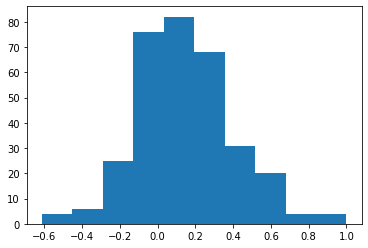

In [27]:
plt.hist(tweets[tweets['china']==1]['polarity'])
plt.show()